<a href="https://colab.research.google.com/github/deethereal/NN/blob/main/MNIST/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import sys, numpy as np, matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage.io import imread,imshow
(x_train,y_train),(x_test,y_test)=mnist.load_data()
COUNT=15000
images, labels=(x_train[0:COUNT].reshape(COUNT,28*28)/255,y_train[0:COUNT])
#one_hot_labels=np.eye((len(labels),10))
one_hot_labels=np.zeros((len(labels),10))
for i,l in enumerate(labels):
  one_hot_labels[i][l]=1
labels=one_hot_labels
print(len(images)/100)

test_images=(x_test.reshape((len(x_test),28*28))/255)
test_labels= np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
  test_labels[i][l]=1

150.0


**Cтохастический градиентный спуск**

In [ ]:

relu=lambda x: (x>=0)*x
relu2div=lambda x: (x>=0)

In [ ]:

learning_rate, niter, hidden_size, pix_per_img, num_labels = (0.005,800,40,784,10)
W01=0.2*np.random.random((pix_per_img,hidden_size)) - 0.1
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(niter):
  error,correct_cnt=(0.0,0)
  #print(error)
  for i in range(len(images)):
    l0=images[i:i+1]
    l1=relu(np.dot(l0,W01))
    drop_out_mask=np.random.randint(2,size=l1.shape) #распределение бернули: выключеаем 50% нейронов
    l1*=drop_out_mask*2
    l2=np.dot(l1,W12)
    
    error += np.sum((labels[i:i+1]-l2)**2)
    correct_cnt+= int(np.argmax(l2)==np.argmax(labels[i:i+1]))

    delta_l2=labels[i:i+1]-l2
    delta_l1=delta_l2.dot(W12.T)*relu2div(l1)
    delta_l1*=drop_out_mask

    W12+=learning_rate*l1.T.dot(delta_l2)
    W01+=learning_rate*l0.T.dot(delta_l1)
  if (j%10==0 or j==niter-1):
    test_error=0
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=relu(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_error+=np.sum((test_labels[i:i+1]-l2)**2)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_err: {} test_acc: {} train_err: {} train_acc: {}'.format(j,test_error/float(len(test_images)),test_correct_cnt/float(len(test_images)),error/float(len(labels)),correct_cnt/float(len(labels))   ))    
    

NameError: ignored

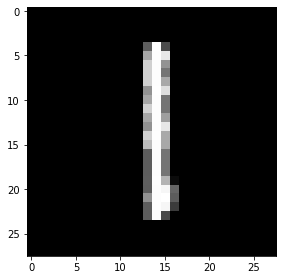

In [ ]:
ix=np.random.randint(len(x_test))
imshow(x_test[ix])

In [ ]:
inpt=x_test[ix].reshape(28*28)/255
pred=np.dot(relu(np.dot(inpt,W01)),W12)
print(np.argmax(pred))

1


**Пакетный градиентный спуск** 

In [ ]:
np.random.seed(1)
batch_size=75
learning_rate, niter= (0.1,300)
hidden_size, pix_per_img, num_labels = (100,784,10)
W01=0.2*np.random.random((pix_per_img,hidden_size)) - 0.1
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1
for j in range(niter):
  error, correct_cnt=(0.0,0)
  for i in range(int(len(images)/batch_size)):
    batch_start, batch_end= i*batch_size, (i+1)*batch_size

    l0=images[batch_start:batch_end]
    l1=relu(np.dot(l0,W01))
    dropout_mask=np.random.randint(2,size=l1.shape)
    l1*=dropout_mask*2
    l2=np.dot(l1,W12)

    error+=np.sum((labels[batch_start:batch_end]-l2)**2)
    for k in range(batch_size):
      correct_cnt+=int(np.argmax(l2[k:k+1])==np.argmax(labels[batch_start+k:batch_start+k+1]))
    l2_delta=(labels[batch_start:batch_end]-l2)/(batch_size)


    l1_delta=l2_delta.dot(W12.T)*relu2div(l1)
    l1_delta*=dropout_mask

    W12+=learning_rate*l1.T.dot(l2_delta)
    W01+=learning_rate*l0.T.dot(l1_delta)
  if (j%10==0 or j==niter-1):
    test_error=0
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=relu(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_error+=np.sum((test_labels[i:i+1]-l2)**2)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_err: {} test_acc: {} train_err: {} train_acc: {}'.format(j,test_error/float(len(test_images)),test_correct_cnt/float(len(test_images)),error/float(len(labels)),correct_cnt/(float(len(labels)))   ))   


iter: 0 test_err: 0.7278960367357099 test_acc: 0.5226 train_err: 1.0925478466072518 train_acc: 0.24133333333333334
iter: 10 test_err: 0.49345430083069375 test_acc: 0.7745 train_err: 0.5487339130271487 train_acc: 0.7133333333333334
iter: 20 test_err: 0.4340764917700484 test_acc: 0.8098 train_err: 0.4882984841680627 train_acc: 0.748
iter: 30 test_err: 0.41211949383458457 test_acc: 0.8103 train_err: 0.4681544042483485 train_acc: 0.786
iter: 40 test_err: 0.40165922960461575 test_acc: 0.8145 train_err: 0.4428957364507865 train_acc: 0.7933333333333333
iter: 50 test_err: 0.396620226510431 test_acc: 0.8149 train_err: 0.44280889357562025 train_acc: 0.7993333333333333
iter: 60 test_err: 0.40216992821679687 test_acc: 0.8128 train_err: 0.44690615134721756 train_acc: 0.7906666666666666
iter: 70 test_err: 0.3993624691772126 test_acc: 0.8118 train_err: 0.4375411378624929 train_acc: 0.816
iter: 80 test_err: 0.38961590433373744 test_acc: 0.8198 train_err: 0.42819225609418854 train_acc: 0.804
iter: 90 t

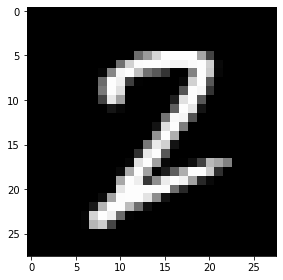

In [ ]:
ix=np.random.randint(len(x_test))
imshow(x_test[ix])

In [ ]:
inpt=x_test[ix].reshape(28*28)/255
pred=np.dot(relu(np.dot(inpt,W01)),W12)
print(np.argmax(pred))

2


**Улучшаем пакетного градинетного спуска**


In [2]:
def tanh(x):
  return np.tanh(x)
def div_tanh(x):
  return 1-(x**2)
def softmax(x):
  temp=np.exp(x)
  return temp/np.sum(temp,axis=1,keepdims=True)

In [ ]:

batch_size=75
learning_rate, niter= (2,251)
hidden_size, pix_per_img, num_labels = (100,784,10)

W01=0.02*np.random.random((pix_per_img,hidden_size)) - 0.01
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(niter):
  correct_cnt=0
  for i in range((len(images/batch_size))//batch_size):
    batch_start,batch_end=(i*batch_size,(i+1)*batch_size)
    l0=images[batch_start:batch_end]
    l1=tanh(np.dot(l0,W01))
    drop_out_mask=np.random.randint(2,size=l1.shape) #распределение бернули: выключеаем 50% нейронов
    l1*=drop_out_mask*2
    l2=softmax(np.dot(l1,W12))
    
    for k in range(batch_size):
      correct_cnt+=int(np.argmax(l2[k:k+1])==np.argmax(labels[batch_start+k:batch_start+k+1]))

    delta_l2=(labels[batch_start:batch_end]-l2)/(batch_size*l2.shape[0])
    delta_l1=delta_l2.dot(W12.T)*div_tanh(l1)
    delta_l1*=drop_out_mask

    W12+=learning_rate*l1.T.dot(delta_l2)
    W01+=learning_rate*l0.T.dot(delta_l1)


  if (j%10==0 or j==niter-1):
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=tanh(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_acc: {} train_acc: {}'.format(j,test_correct_cnt/float(len(test_images)),correct_cnt/float(len(labels))   ))    

iter: 0 test_acc: 0.7139 train_acc: 0.5778666666666666
iter: 10 test_acc: 0.9017 train_acc: 0.8690666666666667
iter: 20 test_acc: 0.893 train_acc: 0.7390666666666666
iter: 30 test_acc: 0.8638 train_acc: 0.5846
iter: 40 test_acc: 0.7427 train_acc: 0.4028
iter: 50 test_acc: 0.1894 train_acc: 0.2258
iter: 60 test_acc: 0.2092 train_acc: 0.16153333333333333
iter: 70 test_acc: 0.2091 train_acc: 0.15326666666666666
iter: 80 test_acc: 0.2089 train_acc: 0.1534
iter: 90 test_acc: 0.1135 train_acc: 0.102
iter: 100 test_acc: 0.1135 train_acc: 0.10226666666666667
iter: 110 test_acc: 0.1135 train_acc: 0.10293333333333334
iter: 120 test_acc: 0.1135 train_acc: 0.10053333333333334


KeyboardInterrupt: ignored

In [ ]:
def pred_nn(ix,w1,w2):
  imshow(x_test[ix])
  plt.show()
  inpt=x_test[ix].reshape(28*28)/255
  pred=(np.dot(tanh(np.dot(inpt,w1)),w2))
  return(np.argmax(pred))

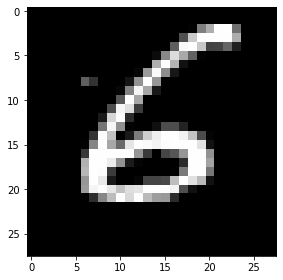

Neural Network thinks this is: 6


In [ ]:
ix=np.random.randint(len(x_test))
print("Neural Network thinks this is:" ,pred_nn(ix,W01,W12))

**Сверточный слой**

In [5]:
def get_image_section(layer,row_from,row_to,col_from,col_to):
  sub_section=layer[:,row_from:row_to,col_from:col_to]
  return sub_section.reshape(-1,1,row_to-row_from,col_to-col_from)
batch_size=128
learning_rate, niter= (2,100)
pix_per_img, num_labels = (784,10)


input_rows=28
input_cols=28
kernel_rows=3
kernel_cols=3
num_kernels=16
hidden_size=(input_rows-kernel_rows)*(input_cols-kernel_cols)*num_kernels
kernels=0.02*np.random.random((kernel_rows*kernel_cols,num_kernels))-0.1
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1
for j in range(niter):
  correct_cnt=0
  for i in range(int(len(images)/batch_size)):
    batch_start, batch_end = i*batch_size,(i+1)*batch_size
    l0=images[batch_start:batch_end]
    l0=l0.reshape(l0.shape[0],28,28)
    l0.shape
    sects=list()
    for row_start in range(l0.shape[1]-kernel_rows):
      for col_start in range(l0.shape[2]-kernel_cols):
        sect=get_image_section(l0,row_start,row_start+kernel_rows,col_start,col_start+kernel_cols)
        sects.append(sect)
    expanded_input=np.concatenate(sects,axis=1)    
    e_shape=expanded_input.shape
    flattended_input=expanded_input.reshape(e_shape[0]*e_shape[1],-1)
    kernel_out=flattended_input.dot(kernels)
    l1=tanh(kernel_out.reshape(e_shape[0],-1))
    dropout=np.random.randint(2,size=l1.shape)
    l1*=dropout*2
    l2=softmax(np.dot(l1,W12))
    #прямое распространение кончилось
    for k in range(batch_size):
      label_set=labels[batch_start+k:batch_start+k+1]
      _inc=int(np.argmax(l2[k:k+1])==np.argmax(label_set))
      correct_cnt+=_inc
    l2_delta=(labels[batch_start:batch_end]-l2)/(batch_size*l2.shape[0])
    l1_delta=np.dot(l2_delta,W12.T)*div_tanh(l1)
    l1_delta*=dropout


    W12+=learning_rate*l1.T.dot(l2_delta)
    l1d_rshp=l1_delta.reshape(kernel_out.shape)
    k_update=flattended_input.T.dot(l1d_rshp)
    kernels-=learning_rate*k_update


  test_correct=0
  for i in range(len(test_images)):
    l0=test_images[i:i+1]
    l0=l0.reshape(l0.shape[0],28,28)
    l0.shape
    sects=list()
    for row_start in range(l0.shape[1]-kernel_rows):
      for col_start in range(l0.shape[2]-kernel_cols):
        sect=get_image_section(l0,row_start,row_start+kernel_rows,col_start,col_start+kernel_cols)
        sects.append(sect)
    expended_in=np.concatenate(sects,axis=1)
    e_sh=expended_in.shape
    flattended_input=expended_in.reshape(e_sh[0]*e_sh[1],-1)

    kernel_out=flattended_input.dot(kernels)
    l1=tanh(kernel_out.reshape(e_sh[0],-1))
    l2=np.dot(l1,W12)

    test_correct+=int(np.argmax(l2)==np.argmax(test_labels[i:i+1]))
  print("iter: {} Test-Acc: {} Train-Acc: {} ".format(j,test_correct/float(len(test_images)),correct_cnt/float(len(images))))  








iter: 0 Test-Acc: 0.8407 Train-Acc: 0.5404 
iter: 1 Test-Acc: 0.8692 Train-Acc: 0.7446666666666667 
iter: 2 Test-Acc: 0.8809 Train-Acc: 0.7880666666666667 
iter: 3 Test-Acc: 0.8899 Train-Acc: 0.8038 
iter: 4 Test-Acc: 0.8935 Train-Acc: 0.8174 
iter: 5 Test-Acc: 0.8945 Train-Acc: 0.8282 
iter: 6 Test-Acc: 0.8976 Train-Acc: 0.8343333333333334 
iter: 7 Test-Acc: 0.8986 Train-Acc: 0.8389333333333333 
iter: 8 Test-Acc: 0.903 Train-Acc: 0.8450666666666666 
iter: 9 Test-Acc: 0.903 Train-Acc: 0.8527333333333333 
iter: 10 Test-Acc: 0.9039 Train-Acc: 0.857 
iter: 11 Test-Acc: 0.9048 Train-Acc: 0.8558 
iter: 12 Test-Acc: 0.9042 Train-Acc: 0.8596 
iter: 13 Test-Acc: 0.904 Train-Acc: 0.8584 
iter: 14 Test-Acc: 0.9058 Train-Acc: 0.8651333333333333 
iter: 15 Test-Acc: 0.9075 Train-Acc: 0.8626666666666667 
iter: 16 Test-Acc: 0.9066 Train-Acc: 0.8666 
iter: 17 Test-Acc: 0.9071 Train-Acc: 0.8675333333333334 
iter: 18 Test-Acc: 0.9073 Train-Acc: 0.8664 
iter: 19 Test-Acc: 0.908 Train-Acc: 0.8710666666666

In [14]:
def kernel_nn(idx):
  imshow(x_test[idx])
  plt.show()
  l0=test_images[idx:idx+1]
  l0=l0.reshape(l0.shape[0],28,28)
  l0.shape
  sects=list()
  for row_start in range(l0.shape[1]-kernel_rows):
    for col_start in range(l0.shape[2]-kernel_cols):
      sect=get_image_section(l0,row_start,row_start+kernel_rows,col_start,col_start+kernel_cols)
      sects.append(sect)
  expended_in=np.concatenate(sects,axis=1)
  e_sh=expended_in.shape
  flattended_input=expended_in.reshape(e_sh[0]*e_sh[1],-1)

  kernel_out=flattended_input.dot(kernels)
  l1=tanh(kernel_out.reshape(e_sh[0],-1))
  l2=np.dot(l1,W12)
  return np.argmax(l2)


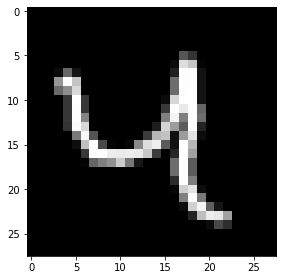

Neural Network thinks this is: 4


In [25]:
idx=np.random.randint(len(test_images))
print("Neural Network thinks this is:" ,kernel_nn(idx))